(944, 1100, 3)
1151533.2106598387
达到90%时的奇异总值 1036379.8895938549
取前10个奇异值 645356.0888583077
取前50个奇异值 856884.838252589
取前100个奇异值 944426.6304609213


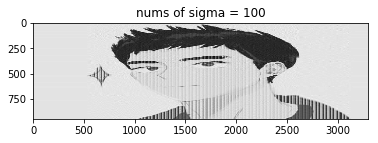

In [20]:

from numpy import mat, eye
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
 
path = './2.jpg'
 
img_eg = mpimg.imread(path)
print(img_eg.shape)
# 奇异值分解
img_temp = img_eg.reshape(944,1100*3)
U, sigma, VT = np.linalg.svd(img_temp)
# 在重构之前，依据前面的方法需要选择达到某个能量度的奇异值
cnt = sum(sigma)
print(cnt)
cnt90 = 0.9 * cnt  # 达到90%时的奇异总值
print("达到90%时的奇异总值",cnt90)
count = 100  # 选择前100个奇异值
cntN = sum(sigma[:count])
 
print("取前10个奇异值",sum(sigma[:10]))
print("取前50个奇异值",sum(sigma[:50]))
print("取前100个奇异值",sum(sigma[:100]))
 
# 重构矩阵
dig = mat(eye(count) * sigma[:count])  # 获得对角矩阵
# dim = data.T * U[:,:count] * dig.I # 降维 格外变量这里没有用
redata = U[:, :count] * dig * VT[:count, :]  # 重构
plt.imshow(redata, cmap='gray')  # 取灰
plt.title("nums of sigma = 100")
plt.show()  # 可以使用save函数来保存图片
